## 1. Random Walks

(a) 1차원 랜덤워크 모형을 시뮬레이션으로 구현하여라. 구체적으로 1차원 격자에서 왼쪽으로 움직일 확률이 1/2, 오른쪽으로 움직일 확률이 1/2로 가정하자. 그리고 $t$시간이 지난 후에 입자가 존재하는 위치를 구하는 코드를 작성하여라. 초기에 입자는 원점에 존재하며 매 타임스텝마다 1번씩 움직인다. (몬테카를로 시뮬레이션)

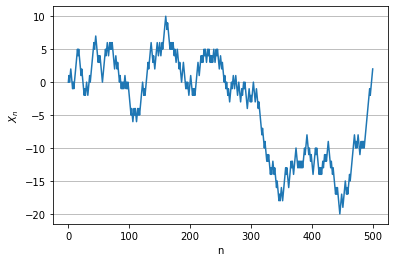

In [13]:
import matplotlib.pyplot as plt
import numpy as np

def random_walk(n):
    elements = [1, -1]
    probabilities = [0.5, 0.5]
    x = [0]
    for i in range(1, n + 1):
        y = np.random.choice(elements, 1, p = probabilities)
        x.append(x[i-1] + y)    
    return x

n = 500
N = [i for i in range(n+1)]

plt.plot(N, random_walk(n))
plt.grid(axis = 'y')
plt.xlabel('n')
plt.ylabel('$X_n$')
plt.show()

(b) 이러한 시행을 충분히 많이 시행하여서 $t$시간 후에 입자가 특정 위치에 존재하는 확률 분포를 구하여라.

In [5]:
import numpy as np

def random_walk(n):
    elements = [1, -1]
    probabilities = [0.5, 0.5]
    x = [0]
    for i in range(1, n + 1):
        y = np.random.choice(elements, 1, p = probabilities)
        x.append(x[i-1] + y)    
    return x

n = 500
N = [i for i in range(n+1)]

np.mean(random_walk(n))

array([-4])

In [6]:
np.var(random_walk(n))

array([100.37665985])

In [7]:
np.std(random_walk(n))

array([3.88306104])

C:\Users\sooji\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


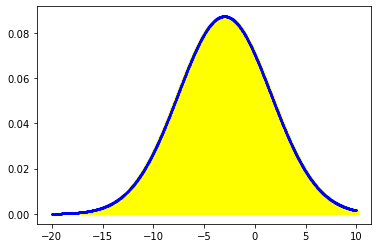

In [33]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

k=np.mean(random_walk(n))
t=np.var(random_walk(n))
p=np.std(random_walk(n))

rv = norm(loc = k, scale = p)
x = np.arange(-20, 10, 0.01)
y = rv.pdf(x)
fig, ax = plt.subplots(1,1)
ax.plot(x,y,'bo',ms=1, label = 'normal pdf')
ax.vlines(x, 0, y, colors='yellow', lw = 5, alpha=0.5)

## 2. Bifurcation

다음으로 주어지는 미분방정식이 있다.$$ \frac{dx}{dt}= rx-x^2. $$

(a) 이 방정식을 다음의 조건에서 풀고 궤적을 그려라. (미분방정식)

1.r=-1, x(0)=2

In [62]:
from sympy import *
import sympy
from sympy import Symbol
import matplotlib.pyplot as plt
%matplotlib inline

In [114]:
r,t = symbols('r,t')
x = Function('x')
x(t)

x(t)

In [115]:
r=-1
A1=Eq(x(t).diff(t),r*x(t)-x(t)**2)
A1

Eq(Derivative(x(t), t), -x(t)**2 - x(t))

In [116]:
dsolve(A1)

Eq(x(t), -C1/(C1 - exp(t)))

In [117]:
B1=dsolve(A1,ics={x(0):2})
B1

Eq(x(t), -2/(3*(2/3 - exp(t))))

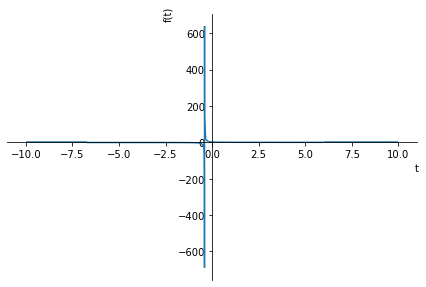

In [118]:
%matplotlib inline
sympy.plot(B1.rhs)

2.r=-1, x(0)=-2

In [119]:
r,t = symbols('r,t')
x = Function('x')
x(t)

x(t)

In [120]:
r=-1
A2=Eq(x(t).diff(t),r*x(t)-x(t)**2)
A2

Eq(Derivative(x(t), t), -x(t)**2 - x(t))

In [121]:
dsolve(A2)

Eq(x(t), -C1/(C1 - exp(t)))

In [122]:
B2=dsolve(A2,ics={x(0):-2})
B2

Eq(x(t), -2/(2 - exp(t)))

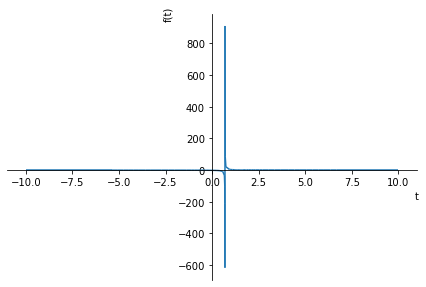

In [123]:
%matplotlib inline
sympy.plot(B2.rhs)

3.r=1, x(0)=2

In [124]:
r,t = symbols('r,t')
x = Function('x')
x(t)

x(t)

In [125]:
r=1
A3=Eq(x(t).diff(t),r*x(t)-x(t)**2)
A3

Eq(Derivative(x(t), t), -x(t)**2 + x(t))

In [126]:
dsolve(A3)

Eq(x(t), 1/(C1*exp(-t) + 1))

In [127]:
B3=dsolve(A3,ics={x(0):2})
B3

Eq(x(t), 1/(1 - exp(-t)/2))

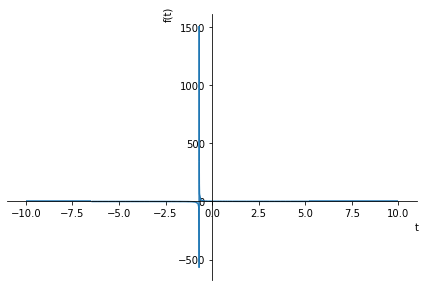

In [128]:
%matplotlib inline
sympy.plot(B3.rhs)

4.r=1, x(0)=-2

In [129]:
r,t = symbols('r,t')
x = Function('x')
x(t)

x(t)

In [130]:
r=1
A4=Eq(x(t).diff(t),r*x(t)-x(t)**2)
A4

Eq(Derivative(x(t), t), -x(t)**2 + x(t))

In [131]:
dsolve(A4)

Eq(x(t), 1/(C1*exp(-t) + 1))

In [132]:
B4=dsolve(A4,ics={x(0):-2})
B4

Eq(x(t), 1/(1 - 3*exp(-t)/2))

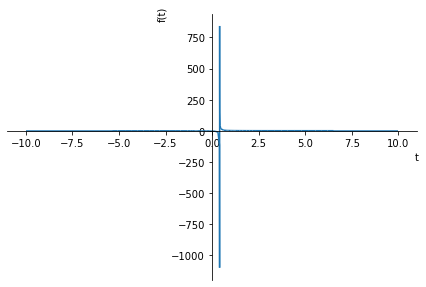

In [133]:
%matplotlib inline
sympy.plot(B4.rhs)

(b)정상상태(dx/dt=0)에서 가능한 해를 구하여라. (방정식)

즉, 다음의 조건에서 파이썬을 이용하여 방정식을 풀어라.$$ 0= rx -x^2 = x( r-x) $$

1.r=-1

In [148]:
x, r = sympy.symbols("x,r")

r=-1
f1=r*x-x**2
f1

-x**2 - x

In [149]:
sympy.factor(f1)

-x*(x + 1)

In [150]:
sympy.solve(f1)

[-1, 0]

2.r=1

In [152]:
x, r = sympy.symbols("x,r")

r=1
f2=r*x-x**2
f2

-x**2 + x

In [153]:
sympy.factor(f2)

-x*(x - 1)

In [154]:
sympy.solve(f2)

[0, 1]